In [1]:
pip install pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")
print(df.head())  # İlk 5 satırı görmek için


             Timestamp  Temperature (°C)
0  2024-03-01 00:00:00         11.490142
1  2024-03-01 00:15:00         10.239238
2  2024-03-01 00:30:00         13.248328
3  2024-03-01 00:45:00         16.519993
4  2024-03-01 01:00:00         11.885730


<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\90545\AppData\Local\Temp\ipykernel_25592\2326146679.py:3: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")


<>:16: SyntaxWarning: invalid escape sequence '\B'
<>:16: SyntaxWarning: invalid escape sequence '\B'
C:\Users\90545\AppData\Local\Temp\ipykernel_25592\4132780176.py:16: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")


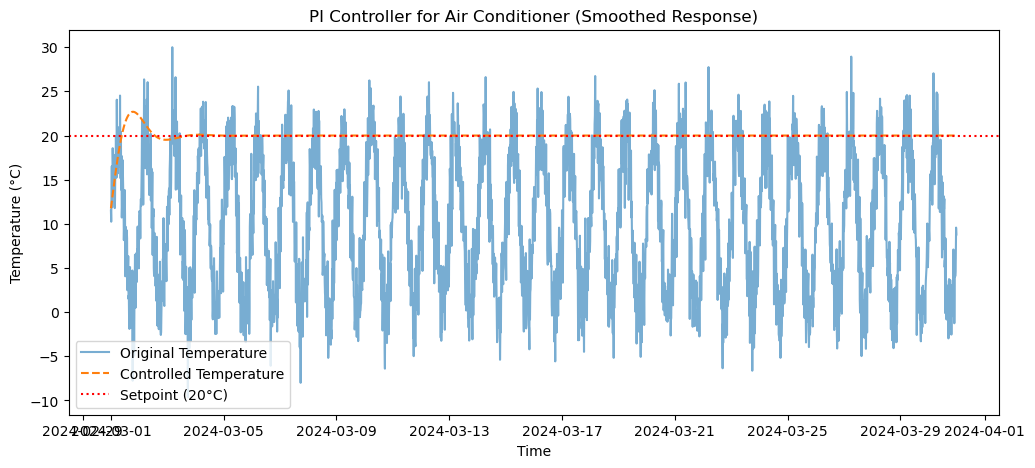

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# PI Controller Parametreleri
Kp = 1.5  # Proportional kazanç (aşırı tepkiyi önlemek için düşürüldü)
Ki = 0.05  # Integral kazanç (yavaş artış sağlamak için düşürüldü)
setpoint = 20.0  # Hedef sıcaklık

# PI Controller Fonksiyonu
def pi_controller(error, integral):
    control_signal = Kp * error + Ki * integral
    return np.clip(control_signal, -50, 50)  # Aşırı tepkiyi önlemek için sınırları daralttık

# Veri setini yükle
df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

temperatures = df["Temperature (\u00b0C)"].values
time_series = df["Timestamp"]
control_signals = []
controlled_temperatures = []

temp_current = temperatures[0]  # Başlangıç sıcaklığı
integral = 0  # Integral başlangıcı

for i in range(len(temperatures)):
    error = setpoint - temp_current  # Hata hesapla
    integral += error  # Integral terimini güncelle
    control_signal = pi_controller(error, integral)  # PI denetleyici
    
    # Klimanın etkisini simüle et (tepkiyi daha yumuşak hale getirdik)
    temp_current += control_signal * 0.02  # Daha küçük bir etki faktörü kullanıldı
    
    controlled_temperatures.append(temp_current)
    control_signals.append(control_signal)

# Sonuçları görselleştir
plt.figure(figsize=(12, 5))
plt.plot(time_series, temperatures, label="Original Temperature", alpha=0.6)
plt.plot(time_series, controlled_temperatures, label="Controlled Temperature", linestyle="dashed")
plt.axhline(y=setpoint, color='r', linestyle='dotted', label="Setpoint (20°C)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("PI Controller for Air Conditioner (Smoothed Response)")
plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\B'
<>:16: SyntaxWarning: invalid escape sequence '\B'
C:\Users\90545\AppData\Local\Temp\ipykernel_25592\458318531.py:16: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")


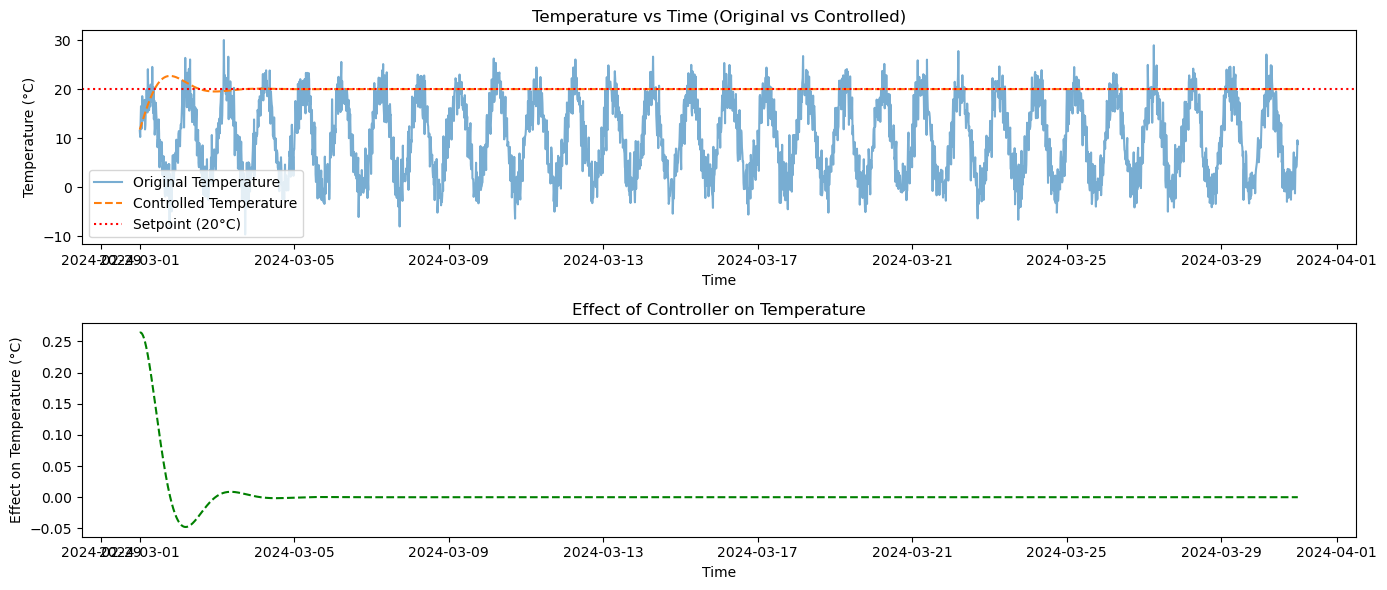

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# PI Controller Parametreleri
Kp = 1.5  # Proportional kazanç
Ki = 0.05  # Integral kazanç
setpoint = 20.0  # Hedef sıcaklık

# PI Controller Fonksiyonu
def pi_controller(error, integral):
    control_signal = Kp * error + Ki * integral
    return np.clip(control_signal, -50, 50)  # Sınırları daraltıyoruz

# Veri setini yükle
df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

temperatures = df["Temperature (\u00b0C)"].values
time_series = df["Timestamp"]
control_signals = []
controlled_temperatures = []
temperature_effects = []  # Kontrol sinyalinin sıcaklığa etkisini saklamak için yeni bir liste

temp_current = temperatures[0]  # Başlangıç sıcaklığı
integral = 0  # Integral başlangıcı

for i in range(len(temperatures)):
    error = setpoint - temp_current  # Hata hesapla
    integral += error  # Integral terimini güncelle
    control_signal = pi_controller(error, integral)  # PI denetleyici
    
    # Klimanın etkisini simüle et
    temp_effect = control_signal * 0.02  # Klimanın sıcaklık üzerindeki etkisi
    temp_current += temp_effect  # Yeni sıcaklık değeri
    
    controlled_temperatures.append(temp_current)
    control_signals.append(control_signal)
    temperature_effects.append(temp_effect)  # Kontrol sinyalinin etkisi

# Sonuçları görselleştir
plt.figure(figsize=(14, 6))

# Orijinal ve denetlenen sıcaklıkları çiz
plt.subplot(2, 1, 1)
plt.plot(time_series, temperatures, label="Original Temperature", alpha=0.6)
plt.plot(time_series, controlled_temperatures, label="Controlled Temperature", linestyle="dashed")
plt.axhline(y=setpoint, color='r', linestyle='dotted', label="Setpoint (20°C)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs Time (Original vs Controlled)")

# Kontrol sinyalinin etkisini çiz
plt.subplot(2, 1, 2)
plt.plot(time_series, temperature_effects, label="Controller Effect", color='g', linestyle="--")
plt.xlabel("Time")
plt.ylabel("Effect on Temperature (°C)")
plt.title("Effect of Controller on Temperature")

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np

# PI Controller Parametreleri
Kp = 1.5  # Proportional kazanç
Ki = 0.05  # Integral kazanç
setpoint = 20.0  # Hedef sıcaklık

# PI Controller Fonksiyonu
def pi_controller(error, integral):
    control_signal = Kp * error + Ki * integral
    return np.clip(control_signal, -50, 50)  # Sınırları daraltıyoruz

# Veri setini yükle
df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

temperatures = df["Temperature (\u00b0C)"].values
time_series = df["Timestamp"]
control_signals = []
controlled_temperatures = []
temperature_effects = []  # Kontrol sinyalinin sıcaklığa etkisini saklamak için yeni bir liste

temp_current = temperatures[0]  # Başlangıç sıcaklığı
integral = 0  # Integral başlangıcı

for i in range(len(temperatures)):
    error = setpoint - temp_current  # Hata hesapla
    integral += error  # Integral terimini güncelle
    control_signal = pi_controller(error, integral)  # PI denetleyici
    
    # Klimanın etkisini simüle et
    temp_effect = control_signal * 0.02  # Klimanın sıcaklık üzerindeki etkisi
    temp_current += temp_effect  # Yeni sıcaklık değeri
    
    controlled_temperatures.append(temp_current)
    control_signals.append(control_signal)
    temperature_effects.append(temp_effect)  # Kontrol sinyalinin etkisi

# Tablonun oluşturulması
table = pd.DataFrame({
    "Timestamp": time_series,
    "Measured Temperature (°C)": temperatures,
    "Controller Effect (°C)": temperature_effects,
    "Controlled Temperature (°C)": controlled_temperatures
})

# Tabloyu göster
print(table)


               Timestamp  Measured Temperature (°C)  Controller Effect (°C)  \
0    2024-03-01 00:00:00                  11.490142            2.638056e-01   
1    2024-03-01 00:15:00                  10.239238            2.641375e-01   
2    2024-03-01 00:30:00                  13.248328            2.641953e-01   
3    2024-03-01 00:45:00                  16.519993            2.639871e-01   
4    2024-03-01 01:00:00                  11.885730            2.635212e-01   
...                  ...                        ...                     ...   
2875 2024-03-30 22:45:00                   4.056555           -1.669775e-15   
2876 2024-03-30 23:00:00                   4.602290           -1.669775e-15   
2877 2024-03-30 23:15:00                   6.045758           -1.669775e-15   
2878 2024-03-30 23:30:00                   9.571316           -1.669775e-15   
2879 2024-03-30 23:45:00                   8.783982           -1.669775e-15   

      Controlled Temperature (°C)  
0              

<>:15: SyntaxWarning: invalid escape sequence '\B'
<>:15: SyntaxWarning: invalid escape sequence '\B'
C:\Users\90545\AppData\Local\Temp\ipykernel_25592\52606270.py:15: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")


In [24]:
import pandas as pd
import numpy as np

# PI Controller Parametreleri
Kp = 1.5  # Proportional kazanç
Ki = 0.05  # Integral kazanç
setpoint = 20.0  # Hedef sıcaklık

# PI Controller Fonksiyonu
def pi_controller(error, integral):
    control_signal = Kp * error + Ki * integral
    return np.clip(control_signal, -50, 50)  # Sınırları daraltıyoruz

# Veri setini yükle
df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

temperatures = df["Temperature (\u00b0C)"].values
time_series = df["Timestamp"]
controlled_temperatures = []
temperature_effects = []  # Kontrol sinyalinin sıcaklığa etkisini saklamak için yeni bir liste

temp_current = temperatures[0]  # Başlangıç sıcaklığı
integral = 0  # Integral başlangıcı

for i in range(len(temperatures)):
    error = setpoint - temp_current  # Hata hesapla
    integral += error  # Integral terimini güncelle
    control_signal = pi_controller(error, integral)  # PI denetleyici
    
    # Klimanın etkisini simüle et
    temp_effect = control_signal * 0.02  # Klimanın sıcaklık üzerindeki etkisi
    temp_current += temp_effect  # Yeni sıcaklık değeri
    
    controlled_temperatures.append(temp_current)
    temperature_effects.append(temp_effect)  # Kontrol sinyalinin etkisi

# Tablonun oluşturulması
table = pd.DataFrame({
    "Timestamp": time_series,
    "Measured Temperature (°C)": temperatures,
    "Controlled Temperature (°C)": controlled_temperatures
})

# Tabloyu göster
print(table)


               Timestamp  Measured Temperature (°C)  \
0    2024-03-01 00:00:00                  11.490142   
1    2024-03-01 00:15:00                  10.239238   
2    2024-03-01 00:30:00                  13.248328   
3    2024-03-01 00:45:00                  16.519993   
4    2024-03-01 01:00:00                  11.885730   
...                  ...                        ...   
2875 2024-03-30 22:45:00                   4.056555   
2876 2024-03-30 23:00:00                   4.602290   
2877 2024-03-30 23:15:00                   6.045758   
2878 2024-03-30 23:30:00                   9.571316   
2879 2024-03-30 23:45:00                   8.783982   

      Controlled Temperature (°C)  
0                       11.753948  
1                       12.018086  
2                       12.282281  
3                       12.546268  
4                       12.809789  
...                           ...  
2875                    20.000000  
2876                    20.000000  
2877           

<>:15: SyntaxWarning: invalid escape sequence '\B'
<>:15: SyntaxWarning: invalid escape sequence '\B'
C:\Users\90545\AppData\Local\Temp\ipykernel_25592\1977580365.py:15: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")


In [30]:
import pandas as pd
import numpy as np

# PI Controller Parametreleri
Kp = 1.5  # Proportional kazanç
Ki = 0.05  # Integral kazanç
setpoint = 20.0  # Hedef sıcaklık

# PI Controller Fonksiyonu
def pi_controller(error, integral):
    control_signal = Kp * error + Ki * integral
    return np.clip(control_signal, -50, 50)  # Sınırları daraltıyoruz

# Veri setini yükle
df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

temperatures = df["Temperature (\u00b0C)"].values
time_series = df["Timestamp"]
controlled_temperatures = []
temperature_effects = []  # Kontrol sinyalinin sıcaklığa etkisini saklamak için yeni bir liste

temp_current = temperatures[0]  # Başlangıç sıcaklığı
integral = 0  # Integral başlangıcı

for i in range(len(temperatures)):
    error = setpoint - temp_current  # Hata hesapla
    integral += error  # Integral terimini güncelle
    control_signal = pi_controller(error, integral)  # PI denetleyici
    
    # Klimanın etkisini simüle et
    temp_effect = control_signal * 0.02  # Klimanın sıcaklık üzerindeki etkisi
    temp_current += temp_effect  # Yeni sıcaklık değeri
    
    controlled_temperatures.append(temp_current)
    temperature_effects.append(temp_effect)  # Kontrol sinyalinin etkisi

# Tablonun oluşturulması
table = pd.DataFrame({
    "Timestamp": time_series,
    "Measured Temperature (°C)": temperatures,
    "Controlled Temperature (°C)": controlled_temperatures
})

# Tüm tabloyu yazdır
print(table)


               Timestamp  Measured Temperature (°C)  \
0    2024-03-01 00:00:00                  11.490142   
1    2024-03-01 00:15:00                  10.239238   
2    2024-03-01 00:30:00                  13.248328   
3    2024-03-01 00:45:00                  16.519993   
4    2024-03-01 01:00:00                  11.885730   
...                  ...                        ...   
2875 2024-03-30 22:45:00                   4.056555   
2876 2024-03-30 23:00:00                   4.602290   
2877 2024-03-30 23:15:00                   6.045758   
2878 2024-03-30 23:30:00                   9.571316   
2879 2024-03-30 23:45:00                   8.783982   

      Controlled Temperature (°C)  
0                       11.753948  
1                       12.018086  
2                       12.282281  
3                       12.546268  
4                       12.809789  
...                           ...  
2875                    20.000000  
2876                    20.000000  
2877           

<>:15: SyntaxWarning: invalid escape sequence '\B'
<>:15: SyntaxWarning: invalid escape sequence '\B'
C:\Users\90545\AppData\Local\Temp\ipykernel_25592\1436597421.py:15: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\BITIRMEPROJESI\\temperature_data.csv")


In [32]:
import pandas as pd

# Tüm satırları gösterme
pd.set_option('display.max_rows', None)  # Maksimum satır sayısını sınırsız yap

# Veri setini yazdır
print(table)

               Timestamp  Measured Temperature (°C)  \
0    2024-03-01 00:00:00                  11.490142   
1    2024-03-01 00:15:00                  10.239238   
2    2024-03-01 00:30:00                  13.248328   
3    2024-03-01 00:45:00                  16.519993   
4    2024-03-01 01:00:00                  11.885730   
5    2024-03-01 01:15:00                  12.511984   
6    2024-03-01 01:30:00                  18.564473   
7    2024-03-01 01:45:00                  16.725191   
8    2024-03-01 02:00:00                  13.591577   
9    2024-03-01 02:15:00                  17.183382   
10   2024-03-01 02:30:00                  14.697361   
11   2024-03-01 02:45:00                  15.196269   
12   2024-03-01 03:00:00                  17.796955   
13   2024-03-01 03:15:00                  11.778557   
14   2024-03-01 03:30:00                  12.758780   
15   2024-03-01 03:45:00                  16.627834   
16   2024-03-01 04:00:00                  15.621761   
17   2024-